In [4]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [5]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library(dplyr)
library(PCAtools)

In [6]:
#rm(, large_list, large_vector, temp_variables)

In [7]:
# Read in the 16S qza files and clean them up for phyloseq
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/tableV_BacArc_99_SCTLD.qza")
ASVtable_16S <- ASVtable_16S$data # Extract the count data from list
ASVtaxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/taxaVsearch_rep-seqs-dn-99_SCTLD.qza")
taxtable_16S <- ASVtaxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) 
# Convert taxonomy info to data frame with correct taxonomy labels
taxtable_16S <- taxtable_16S[-1,]
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids




Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 70468 rows [2, 7, 11, 13, 15, 17, 21, 23, 27, 29, 34, 38, 39, 41, 43, 46, 47, 50, 54, 56, ...].”


In [8]:
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

In [9]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
physeq_16S
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

In [10]:
sub_samples = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton", "Seawater", "Sediment")

sub_samples2 = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton")

ps.coral =subset_samples(physeq_16S, sample_type %in% sub_samples
                       )

ps.coral


ps.coral_TL_reef =subset_samples(ps.coral, Biome=="Field")
ps.coral_TL_reef
                 
ps.coral_TL_meso =subset_samples(ps.coral, Biome=="Aquaria")
ps.coral_TL_meso    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 2362 samples ]
sample_data() Sample Data:       [ 2362 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 1274 samples ]
sample_data() Sample Data:       [ 1274 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 1088 samples ]
sample_data() Sample Data:       [ 1088 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

In [11]:
ps.coral = filter_taxa(ps.coral, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral
  
ps.coral_TL_reef = filter_taxa(ps.coral_TL_reef, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral_TL_reef
                          
ps.coral_TL_meso = filter_taxa(ps.coral_TL_meso, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral_TL_meso                                            


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 227 taxa and 2362 samples ]
sample_data() Sample Data:       [ 2362 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 227 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 313 taxa and 1274 samples ]
sample_data() Sample Data:       [ 1274 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 313 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 270 taxa and 1088 samples ]
sample_data() Sample Data:       [ 1088 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 270 taxa by 8 taxonomic ranks ]

In [12]:
ps.coral_clr <- microbiome::transform(ps.coral, 'clr')
ps.coral_TL_reef_CLR <- microbiome::transform(ps.coral_TL_reef, 'clr')
ps.coral_TL_meso_CLR <- microbiome::transform(ps.coral_TL_meso, 'clr')

In [13]:
ps.coral_clr.ord <- ordinate(ps.coral_clr, "RDA", "euclidean")
ps.coral_TL_meso_ord <- ordinate(ps.coral_TL_meso_CLR, "RDA", "euclidean")

ps.coral_TL_reef_ord <- ordinate(ps.coral_TL_reef_CLR, "RDA", "euclidean")

missing observations due to 'group' removed




Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups       2 2.0693e+11 1.0347e+11 52.241    999  0.001 ***
Residuals 2028 4.0165e+12 1.9805e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
             diff        lwr        upr    p adj
DL-AH  21654.1205  16443.238  26865.003 0.000000
DU-AH    446.7357  -6025.385   6918.857 0.985655
DU-DL -21207.3848 -28113.903 -14300.867 0.000000


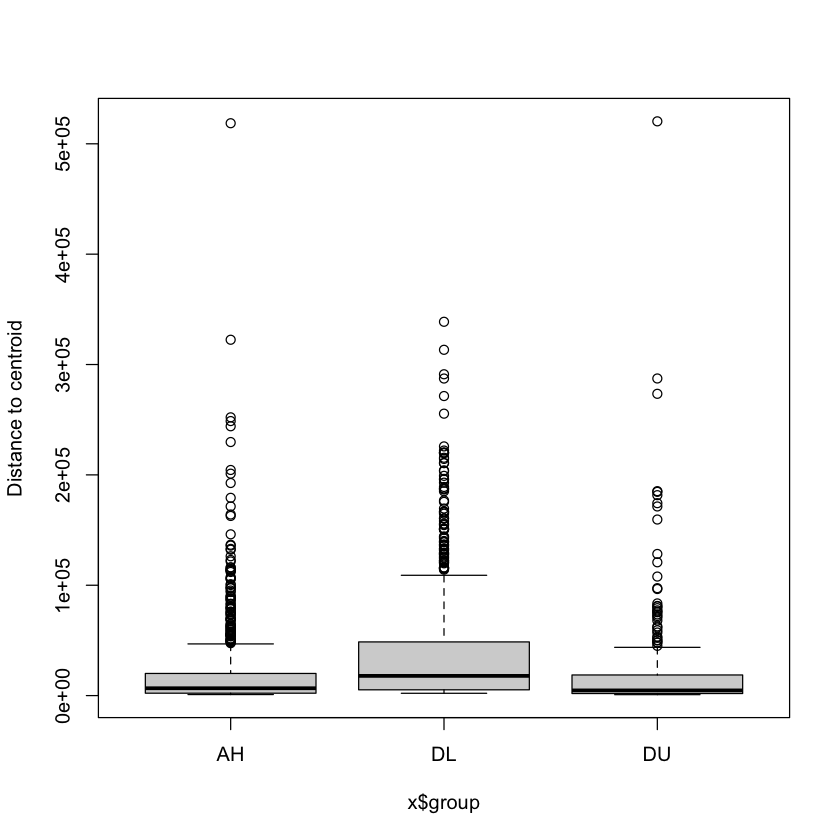

In [15]:
dis_clr <- vegdist(otu_table(t(ps.coral)), method ="euclidean")
# PERMDISP2 procedure for the analysis of multivariate homogeneity of group dispersions (variances).
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$tissue_type)
permutest(mod_clr, permutations = how(nperm=999))
TukeyHSD(mod_clr)
boxplot(mod_clr)
#mod_dist_clr= as.data.frame(mod_clr$distances)
#dim(mod_dist_clr)
#mod_dist_df_clr=cbind(sample_data(ps_coral), mod_dist_clr) 
#head(mod_dist_df_clr)



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups       4 3.5883e+11 8.9708e+10 53.287    999  0.001 ***
Residuals 2357 3.9680e+12 1.6835e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                                    diff        lwr        upr     p adj
USA:Florida-USA:FLKeys        -30024.725 -46340.263 -13709.187 0.0000054
USA:FTL-USA:FLKeys            -31538.689 -39230.627 -23846.752 0.0000000
USA:Miami-USA:FLKeys          -26295.677 -32968.820 -19622.533 0.0000000
USA:VirginIslands-USA:FLKeys  -10086.221 -16219.024  -3953.419 0.0000732
USA:FTL-USA:Florida            -1513.964 -18979.515  15951.587 0.9993073
USA:Miami-USA:Florida           3729.048 -13312.384  20770.480 0.9755087
USA:VirginIslands-USA:Florida  19938.504   3101.317  36775.690 0.0108937
USA:Miami-USA:FTL               5243.013  -3888.228  14374.253 0.5185459
USA:VirginIslands-USA:FTL      21452.468  12708.328  30196.608 0.0000000
USA:VirginIslands-USA:Miami    16209.455   8346.573  24072.338 0.0000002


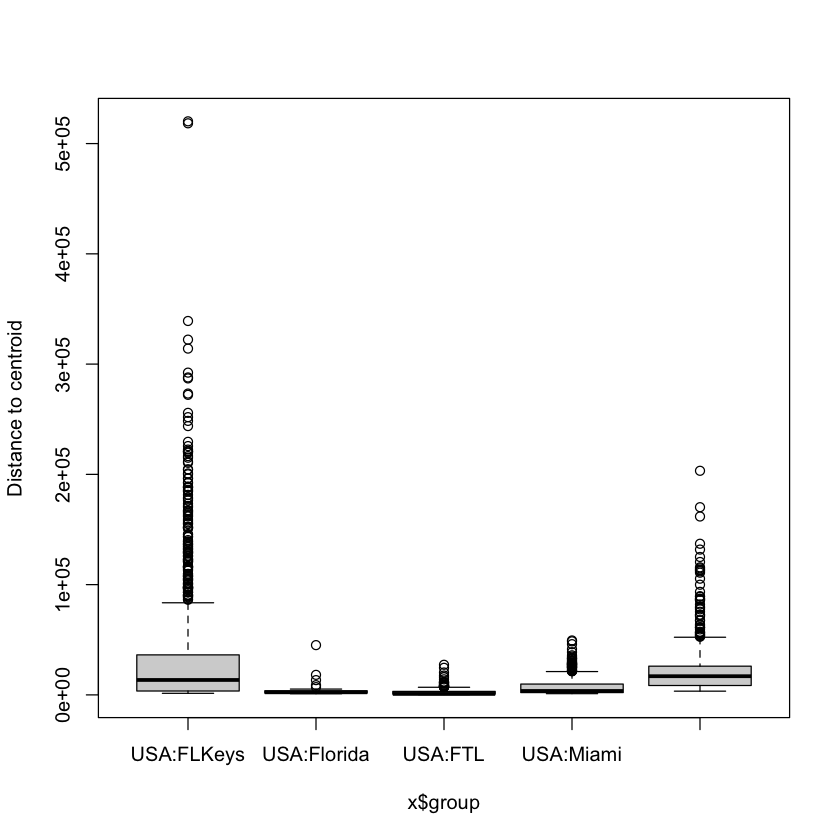

In [16]:
#dis_clr <- vegdist(otu_table(t(ps.coral)), method ="euclidean")
# PERMDISP2 procedure for the analysis of multivariate homogeneity of group dispersions (variances).
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$country)
permutest(mod_clr)
TukeyHSD(mod_clr)
boxplot(mod_clr)


	Homogeneity of multivariate dispersions

Call: betadisper(d = dis_clr, group = sample_data(ps.coral)$Biome)

No. of Positive Eigenvalues: 227
No. of Negative Eigenvalues: 0

Average distance to median:
Aquaria   Field 
  30022   19212 

Eigenvalues for PCoA axes:
(Showing 8 of 227 eigenvalues)
    PCoA1     PCoA2     PCoA3     PCoA4     PCoA5     PCoA6     PCoA7     PCoA8 
1.809e+12 1.068e+12 7.003e+11 3.454e+11 2.435e+11 1.565e+11 1.353e+11 1.085e+11 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups       1 6.8576e+10 6.8576e+10 38.092    999  0.001 ***
Residuals 2360 4.2486e+12 1.8003e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                   diff       lwr       upr p adj
Field-Aquaria -10810.01 -14244.64 -7375.388     0


ERROR: Error in eval(predvars, data, env): object 'Biome' not found


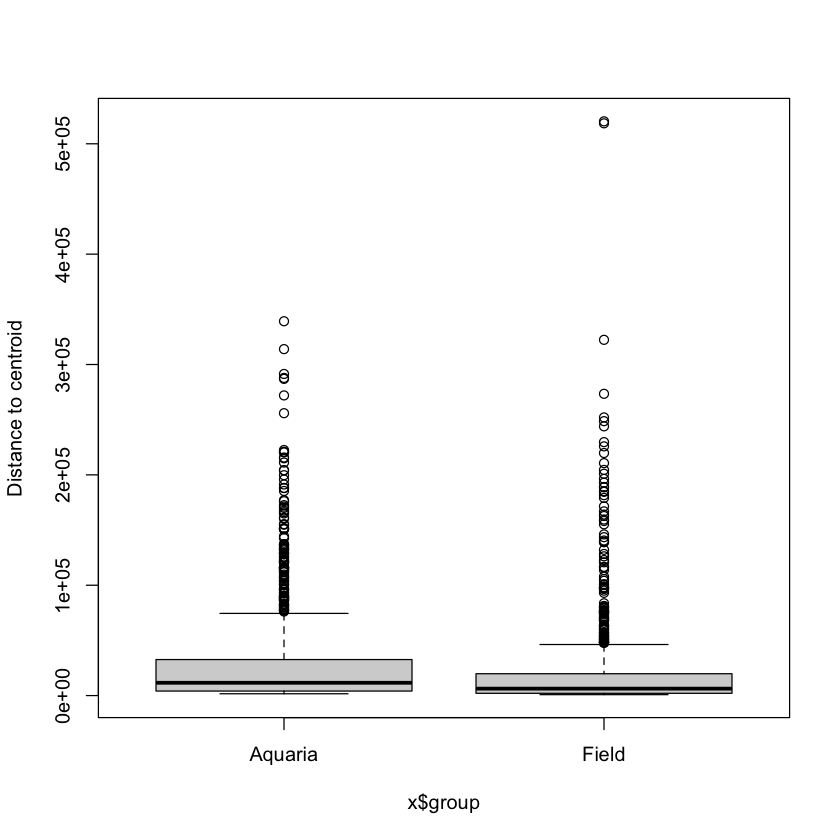

In [19]:
dis_clr <- vegdist(otu_table(t(ps.coral)), method ="euclidean")
# PERMDISP2 procedure for the analysis of multivariate homogeneity of group dispersions (variances).
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$Biome)
mod_clr
permutest(mod_clr)
TukeyHSD(mod_clr)
boxplot(mod_clr)

adonis(dis_clr~Biome, 
       data =ps_clr_df, permutations = 999, 
         method = "euclidean", strata=ps_clr_meta$Biome)

In [ ]:
# PERMDISP2 procedure for the analysis of multivariate homogeneity of group dispersions (variances).
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$primer_names)
mod_clr
permutest(mod_clr)
TukeyHSD(mod_clr)
boxplot(mod_clr)

In [ ]:
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$species_code)
mod_clr
permutest(mod_clr)
TukeyHSD(mod_clr)
boxplot(mod_clr)


	Homogeneity of multivariate dispersions

Call: betadisper(d = dis_clr, group =
sample_data(ps.coral)$sample_type)

No. of Positive Eigenvalues: 227
No. of Negative Eigenvalues: 0

Average distance to median:
                Mucus              Seawater              Sediment 
                15243                 12869                  2478 
         TissueSlurry TissueSlurry_Skeleton 
                29483                  5289 

Eigenvalues for PCoA axes:
(Showing 8 of 227 eigenvalues)
    PCoA1     PCoA2     PCoA3     PCoA4     PCoA5     PCoA6     PCoA7     PCoA8 
1.809e+12 1.068e+12 7.003e+11 3.454e+11 2.435e+11 1.565e+11 1.353e+11 1.085e+11 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups       4 1.8221e+11 4.5552e+10 25.748    999  0.001 ***
Residuals 2357 4.1699e+12 1.7692e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                                         diff        lwr       upr     p adj
Seawater-Mucus                      -2374.671 -12381.434  7632.092 0.9670774
Sediment-Mucus                     -12764.902 -24283.498 -1246.307 0.0211555
TissueSlurry-Mucus                  14239.999   7769.601 20710.397 0.0000000
TissueSlurry_Skeleton-Mucus         -9954.640 -26756.679  6847.398 0.4863083
Sediment-Seawater                  -10390.232 -23263.367  2482.904 0.1787099
TissueSlurry-Seawater               16614.670   7959.867 25269.473 0.0000017
TissueSlurry_Skeleton-Seawater      -7579.970 -25338.012 10178.072 0.7712412
TissueSlurry-Sediment               27004.901  16639.172 37370.631 0.0000000
TissueSlurry_Skeleton-Sediment       2810.262 -15841.569 21462.093 0.9940007
TissueSlurry_Skeleton-TissueSlurry -24194.639 -40228.316 -8160.962 0.0003783


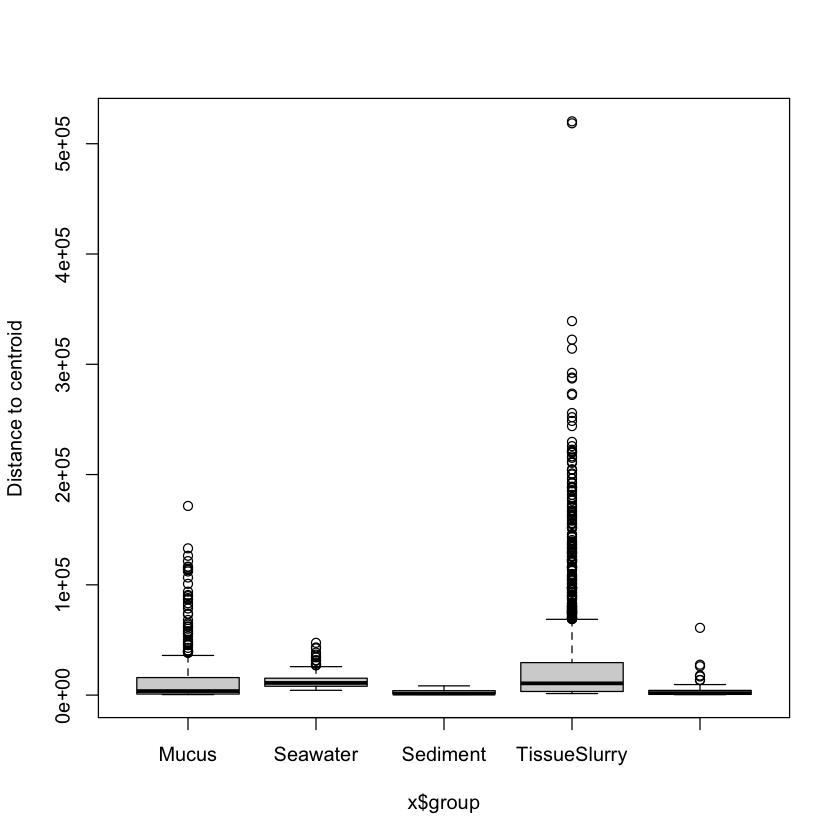

In [16]:
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$sample_type)
mod_clr
permutest(mod_clr)
TukeyHSD(mod_clr)
boxplot(mod_clr)

missing observations due to 'group' removed




	Homogeneity of multivariate dispersions

Call: betadisper(d = dis_clr, group = sample_data(ps.coral)$reef_name)

No. of Positive Eigenvalues: 227
No. of Negative Eigenvalues: 0

Average distance to median:
AirportCoralHeads(KeyWest)               Allisons3005 
                   59033.8                      483.9 
                    Andys4                 BlackPoint 
                     679.6                    13401.9 
       BocaChicaPatchReefs               BootKeyPatch 
                     223.4                    18859.7 
                BuckIsland                   BurrFish 
                   16369.8                    10014.7 
                CliffGreen                  ConchReef 
                    7115.7                     2096.4 
                CRFNursery                DryTortugas 
                   81731.3                     7877.8 
               DustanRocks            EastTurtleShoal 
                   23413.8                    22294.1 
           EastWasherw


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups      38 1.1811e+12 3.1083e+10 32.289    999  0.001 ***
Residuals 2317 2.2304e+12 9.6264e+08                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                                                            diff          lwr
Allisons3005-AirportCoralHeads(KeyWest)            -58549.908986 -144018.1801
Andys4-AirportCoralHeads(KeyWest)                  -58354.164577  -92571.4575
BlackPoint-AirportCoralHeads(KeyWest)              -45631.846898  -64886.3500
BocaChicaPatchReefs-AirportCoralHeads(KeyWest)     -58810.366473 -113172.6709
BootKeyPatch-AirportCoralHeads(KeyWest)            -40174.047359  -55145.2798
BuckIsland-AirportCoralHeads(KeyWest)              -42663.951165  -59566.1915
BurrFish-AirportCoralHeads(KeyWest)                -49019.115888  -76956.1440
CliffGreen-AirportCoralHeads(KeyWest)              -51918.089422  -73592.8284
ConchReef-AirportCoralHeads(KeyWest)               -56937.423510  -92486.8618
CRFNursery-AirportCoralHeads(KeyWest)               22697.526054    8213.4001
DryTortug

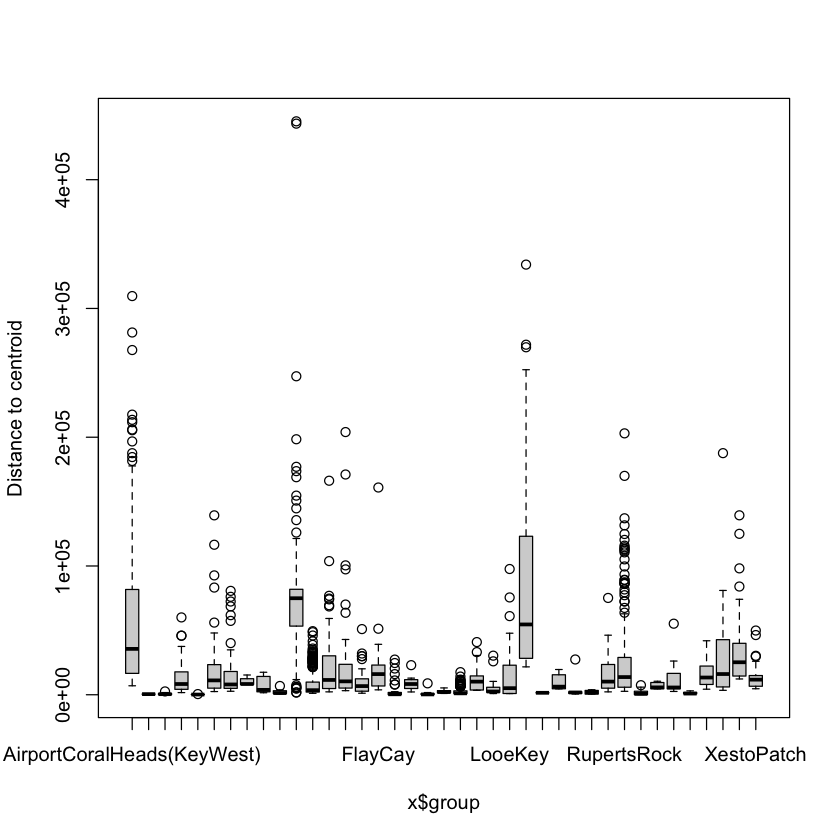

In [17]:
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$reef_name)
mod_clr
permutest(mod_clr)
TukeyHSD(mod_clr)
boxplot(mod_clr)


	Homogeneity of multivariate dispersions

Call: betadisper(d = dis_clr, group = sample_data(ps.coral)$Alias)

No. of Positive Eigenvalues: 227
No. of Negative Eigenvalues: 0

Average distance to median:
             AcroporaDisease                    Breviolum 
                       81731                         7878 
                   ENS_LBTS1                         EPA1 
                        2394                        10278 
        FloridaReefTract2017              JSEP_SCTLD_Endo 
                        4635                         7399 
                LooeKey_2018     SCTLD_size_fractionation 
                        4264                        13351 
           Sediment_mesocosm         SSIDDiseaseConchReef 
                        2441                         2096 
        StewartMedina_FL2019            SWGmicrobiome2018 
                        1395                        22058 
             SWGTransmission  TransmissionExperimentMucus 
                       62043 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups      15 1.1499e+12 7.6658e+10 78.049    999  0.001 ***
Residuals 2346 2.3042e+12 9.8217e+08                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                                                                 diff
Breviolum-AcroporaDisease                                -73853.56929
ENS_LBTS1-AcroporaDisease                                -79337.03364
EPA1-AcroporaDisease                                     -71453.29822
FloridaReefTract2017-AcroporaDisease                     -77095.95499
JSEP_SCTLD_Endo-AcroporaDisease                          -74332.77585
LooeKey_2018-AcroporaDisease                             -77467.21029
SCTLD_size_fractionation-AcroporaDisease                 -68380.05475
Sediment_mesocosm-AcroporaDisease                        -79290.21107
SSIDDiseaseConchReef-AcroporaDisease                     -79634.94956
StewartMedina_FL2019-AcroporaDisease                     -80336.22408
SWGmicrobiome2018-AcroporaDisease                        -59673.40207
SWGTransmission-AcroporaDis

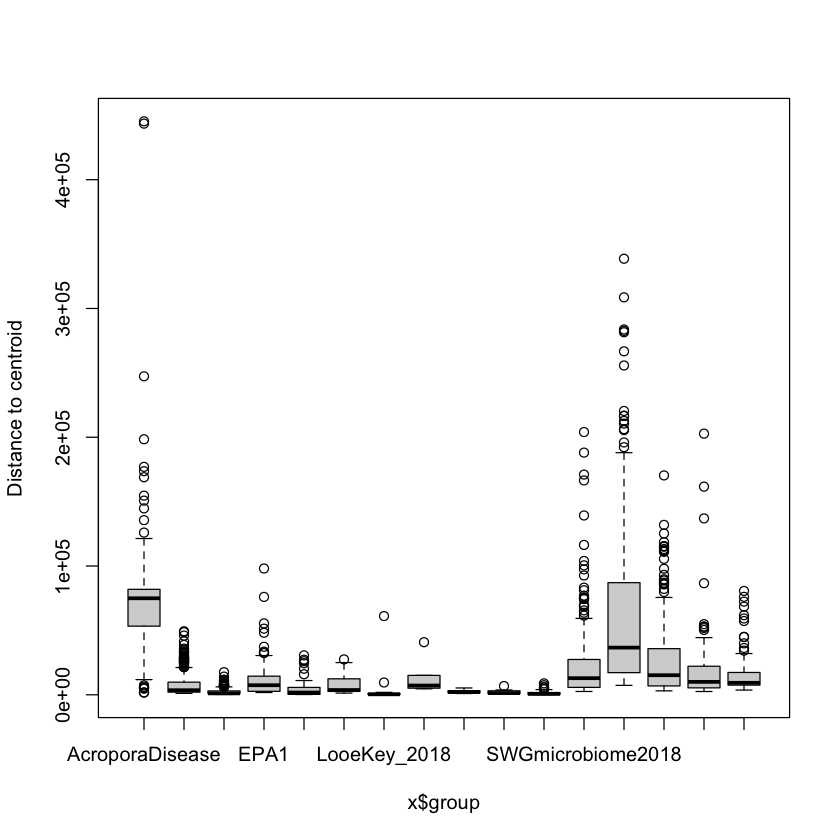

In [18]:
mod_clr <- betadisper(dis_clr, sample_data(ps.coral)$Alias)
mod_clr
permutest(mod_clr)
TukeyHSD(mod_clr)
boxplot(mod_clr)

In [23]:
ps_clr_df=as.data.frame(otu_table(ps.coral_clr))
ps_clr_meta= as(sample_data(ps.coral_clr), "data.frame")
ps_clr_meta_edit = ps_clr_meta %>% 
#as.tibble() %>% 
#dplyr::rename(Study = Alias) %>%
#dplyr::rename("Biome" = environment_.biome.) %>% 
dplyr::rename("Dissease.Status" = tissue_type) %>%
dplyr::rename("Sample.Type" = sample_type) %>%
dplyr::rename("Coral.Species" = species_code) %>%
dplyr::rename("Year" = collection_year) %>%
dplyr::rename("Region" = country) %>%
dplyr::rename("Primers" = primer_names)


In [24]:
 p <- pca(ps_clr_df, metadata = ps_clr_meta_edit, removeVar = 0.1)

-- removing the lower 10% of variables based on variance



Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Study is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Primers is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Biome is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Coral.Species is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Dissease.Status is not numeric - please check the source data as non-numeric variable

Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = cor

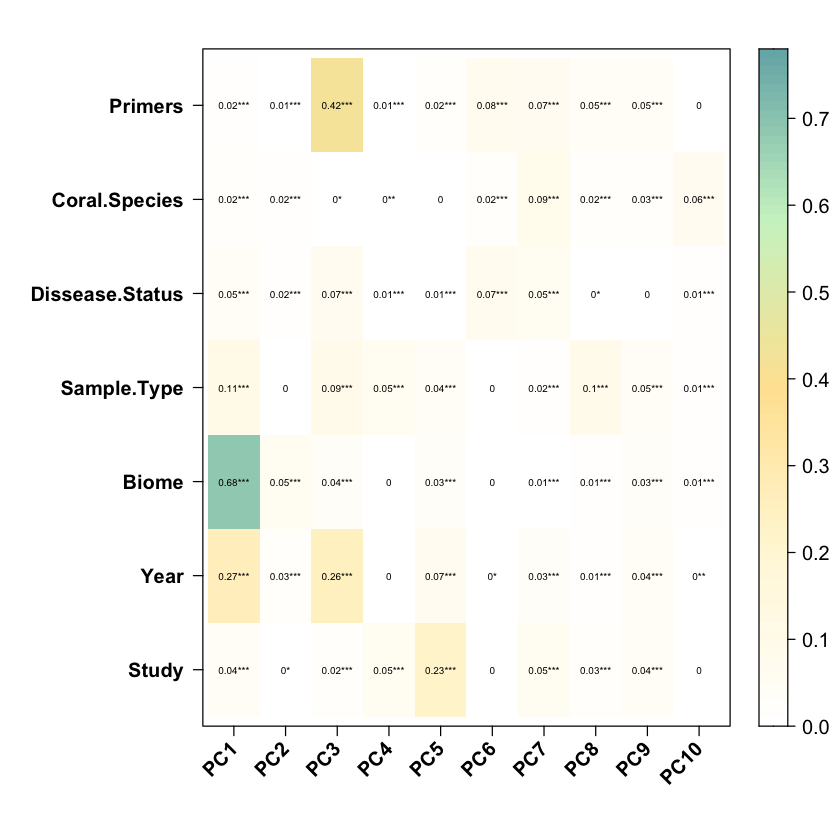

In [26]:
eigencorplot(p,
    metavars = c("Study", "Primers", "Biome", "Coral.Species", 
                 "Dissease.Status", "Sample.Type", "Year"),
              col = c('white', 'cornsilk1', "#FFE4A1",  '#CFF3CA', "#77B3B5"),
    cexCorval = 0.5,
    fontCorval = 0.5,
    cexTitleX = 4,
    
    #posLab = 'all',
    rotLabX = 45,
    scale = TRUE,
    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH')

In [27]:
jpeg("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/PC_R2.jpeg", width = 5.5, height = 5,
     units = 'in', res = 300)

 eigencorplot(p,
    metavars = c("Study", "Primers", "Biome", "Coral.Species", 
                 "Dissease.Status", "Sample.Type", "Year"),
              col = c('white', 'cornsilk1', "#FFE4A1",  '#CFF3CA', "#77B3B5"),
    cexCorval = 0.5,
    fontCorval = 0.5,
    cexTitleX = 4,
    
    #posLab = 'all',
    rotLabX = 45,
    scale = TRUE,
    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH')
    #signifSymbols = c( '***', '**', '*', ''),
    #signifCutpoints = c( 0, 0.01, 0.05, 1))

dev.off()

Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Study is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Primers is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Biome is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Coral.Species is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Dissease.Status is not numeric - please check the source data as non-numeric variable

Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = cor

pdf 
  2

In [34]:
colnames(ps_clr_meta)

[1] "SampleID"                        "BioSample"                      
 [3] "Run"                             "SRA_accession"                  
 [5] "Lab"                             "Experiment"                     
 [7] "Alias"                           "Study"                          
 [9] "Collection_ID"                   "Species_counts"                 
[11] "collection_time"                 "collection_year"                
[13] "collection_month"                "collection_date"                
[15] "collected_by"                    "environment_.biome."            
[17] "Biome"                           "Study_dvide"                    
[19] "latitude"                        "longitude"                      
[21] "country"                         "reef_name"                      
[23] "reef_abbr"                       "reef_type"                      
[25] "SCTLD_status"                    "SCTLD_site_duration"            
[27] "depth"                           "temperature"                    
[29] "salinity"                        "pH"                             
[31] "nutrientdatacollected."          "sample_type"                    
[33] "binary_algal_contact"            "binary_disease"                 
[35] "binary_bleaching"                "tissue_type"                    
[37] "field_host_family_id"            "field_host_genus_id"            
[39] "field_host_species_id"           "species_code"                   
[41] "project_colony_code"             "colony_max_diameter"            
[43] "colony_max_height"               "colony_old_mortality"           
[45] "colony_recent_mortality_disease" "colony_percent_diseased"        
[47] "lesion_distribution"             "lesion_start"                   
[49] "lesion_rate"                     "lesion_margin"                  
[51] "disease_colony_sample_distance"  "complex_robust"                 
[53] "dna_extraction_method"           "X16S_variable_region"           
[55] "primer_names"                    "forwardPrimer"                  
[57] "ReversePrimer"                   "linkerPrimerSequence"           
[59] "platform"                        "platformChemistry"              
[61] "sequencing_facility"             "barcodes"                       
[63] "basepairs"                       "notes"

In [35]:
adonis(otu_table(t(ps.coral_clr))~ Study, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", strata=ps_clr_meta$Biome)


Call:
adonis(formula = otu_table(t(ps.coral_clr)) ~ Study, data = ps_clr_meta,      permutations = 999, method = "euclidean", strata = ps_clr_meta$Biome) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Study       15   1880682  125379   97.02 0.38284  0.001 ***
Residuals 2346   3031730    1292         0.61716           
Total     2361   4912413                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [36]:
adonis(otu_table(t(ps.coral_clr))~ collection_year, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", strata=ps_clr_meta$Study)


Call:
adonis(formula = otu_table(t(ps.coral_clr)) ~ collection_year,      data = ps_clr_meta, permutations = 999, method = "euclidean",      strata = ps_clr_meta$Study) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                  Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)
collection_year    4    690324  172581  96.344 0.14053  0.501
Residuals       2357   4222088    1791         0.85947       
Total           2361   4912413                 1.00000       

In [37]:
adonis(otu_table(t(ps.coral_clr))~ primer_names, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", strata=ps_clr_meta$Study)


Call:
adonis(formula = otu_table(t(ps.coral_clr)) ~ primer_names, data = ps_clr_meta,      permutations = 999, method = "euclidean", strata = ps_clr_meta$Study) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

               Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)
primer_names    4    328768   82192  42.265 0.06693      1
Residuals    2357   4583644    1945         0.93307       
Total        2361   4912413                 1.00000       

In [38]:
adonis(otu_table(t(ps.coral_clr))~ sample_type, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", strata=ps_clr_meta$Study)


Call:
adonis(formula = otu_table(t(ps.coral_clr)) ~ sample_type, data = ps_clr_meta,      permutations = 999, method = "euclidean", strata = ps_clr_meta$Study) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

              Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_type    4    755811  188953  107.15 0.15386  0.001 ***
Residuals   2357   4156602    1764         0.84614           
Total       2361   4912413                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [1]:
adonis(otu_table(t(ps.coral_clr))~ Biome, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", strata=ps_clr_meta$Study)

ERROR: Error in adonis(otu_table(t(ps.coral_clr)) ~ Biome, data = ps_clr_meta, : could not find function "adonis"


In [41]:
adonis(otu_table(t(ps.coral_clr))~Biome*sample_type*primer_names*collection_year*Study, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean") 


Call:
adonis(formula = otu_table(t(ps.coral_clr)) ~ Biome * sample_type *      primer_names * collection_year * Study, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                              Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Biome                          1    888725  888725  759.24 0.18091  0.001 ***
sample_type                    4    585687  146422  125.09 0.11923  0.001 ***
primer_names                   4    240465   60116   51.36 0.04895  0.001 ***
collection_year                4    253562   63390   54.15 0.05162  0.001 ***
Study                          7    185441   26492   22.63 0.03775  0.001 ***
sample_type:primer_names       1     12300   12300   10.51 0.00250  0.001 ***
sample_type:collection_year    1      1250    1250    1.07 0.00025  0.339    
sample_type:Study              1      8257    8257    7.05 0.00168  0.001 ***
Residuals           

In [40]:
adonis(otu_table(t(ps.coral_clr))~ tissue_type, 
       data =ps_clr_meta, permutations = 999, 
         method = "euclidean", na.action=na.omit, strata=ps_clr_meta$Biome)

ERROR: Error in G * t(hat): non-conformable arrays
